# <center>__Project 2__</center>
## <center>__Cointegration, Error-Correction, and Pairs Trading__</center>
### <center>Finance 5330<center>
#### <center>Emily Rice & Ryan Voges<center>

# __Getting the Data__

In [3]:
#import Pkg; Pkg.add("GLM")
#import Pkg; Pkg.add("HypothesisTests")
using StatsKit
using StatsPlots
using DataFrames
using GLM
using HypothesisTests: ADFTest

In [4]:
df = CSV.read("WaterStocks.csv");

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:46
└ @ CSV C:\Users\chefm\.julia\packages\CSV\UIgP3\src\CSV.jl:46


In [5]:
first(df,5)

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI
,Int64,Int64,String,String,Int64,Float64,Float64
1,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.0,30.0
2,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
3,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
4,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
5,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0


In [6]:
unique(df.TICKER)

5-element Array{String,1}:
 "CTWS"
 "PSC"
 "WTR"
 "SCW"
 "AWR"

In [7]:
unique(df.PERMNO)

3-element Array{Int64,1}:
 26463
 52898
 71475

### __Filtering By Permno__

In [80]:
ctws_df = filter(x -> x.PERMNO .== 26463, df);

In [9]:
wtr_df = filter(x -> x.PERMNO .== 52898, df);

In [19]:
awr_df = filter(x -> x.PERMNO .== 71475, df);

In [22]:
ctws = abs.(ctws_df.PRC);
wtr = abs.(wtr_df.PRC);
awr = abs.(awr_df.PRC);

# __ADF Tests__

### __ADF Level Tests__

In [23]:
ADFTest(ctws, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.000257159

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4537

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.602278
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [24]:
ADFTest(awr, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -3.16447e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.6568

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.0807821
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [25]:
ADFTest(wtr, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.000191358

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5087

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.469381
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


### __ADF Log Tests__

In [26]:
ADFTest(log.(ctws), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -4.19314e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5608

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.339293
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [27]:
ADFTest(log.(wtr), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.68629e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.6389

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      -0.131485
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [28]:
ADFTest(log.(awr), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          3.5887e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.7785

Details:
    sample size in regression:          3009
    number of lags:                     10
    ADF statistic:                      0.313343
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


### __ADF Diff Log Tests__

In [16]:
ADFTest(diff(log.(ctws)), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.60448

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3008
    number of lags:                     10
    ADF statistic:                      -19.3517
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [17]:
ADFTest(diff(log.(wtr)), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.25151

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-28

Details:
    sample size in regression:          3008
    number of lags:                     10
    ADF statistic:                      -18.2898
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [29]:
ADFTest(diff(log.(awr)), :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.38464

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-28

Details:
    sample size in regression:          3008
    number of lags:                     10
    ADF statistic:                      -18.7534
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


# __Creating Data Frame and Doing Cointegration Regressions__

In [44]:
data = DataFrame(Δctws = diff(log.(ctws))[2:end], Δctwslag = Δctws[1:end-1], Δwtr = diff(log.(wtr))[2:end], Δwtrlag = Δwtr[1:end-1], Δawr = diff(log.(awr))[2:end], Δawrlag = Δawr[1:end-1]);

### __Regressions__

In [50]:
reg_ctws_wtr = GLM.lm(@formula(Δctws~Δwtr), data)
ε_cw = residuals(reg_ctws_wtr);
reg_ctws_wtr

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δctws ~ 1 + Δwtr

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -7.19055e-5  0.000413596  -0.17    0.8620  -0.000882863  0.000739052
Δwtr          0.168259    0.018837      8.93    <1e-18   0.131324     0.205194
─────────────────────────────────────────────────────────────────────────────────

In [51]:
reg_ctws_awr = GLM.lm(@formula(Δctws~Δawr), data)
ε_ca = residuals(reg_ctws_awr);
reg_ctws_awr

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δctws ~ 1 + Δawr

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.000102996  0.000408828  -0.25    0.8011  -0.000904607  0.000698615
Δawr          0.23537      0.0190576    12.35    <1e-33   0.198002     0.272737
──────────────────────────────────────────────────────────────────────────────────

In [52]:
reg_wtr_awr = GLM.lm(@formula(Δwtr~Δawr), data)
ε_wa = residuals(reg_wtr_awr);
reg_wtr_awr

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δwtr ~ 1 + Δawr

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -3.27338e-5  0.000384429  -0.09    0.9321  -0.000786504  0.000721036
Δawr          0.281183    0.0179203    15.69    <1e-52   0.246045     0.31632
─────────────────────────────────────────────────────────────────────────────────

### __Adding Residuals to the Data Frame and Testing Residuals__

In [54]:
ε_data = DataFrame(Δctws = diff(log.(ctws))[2:end], Δctwslag = Δctws[1:end-1], Δwtr = diff(log.(wtr))[2:end], Δwtrlag = Δwtr[1:end-1], Δawr = diff(log.(awr))[2:end], Δawrlag = Δawr[1:end-1], ε_wa = ε_wa, ε_ca = ε_ca, ε_cw = ε_cw);

In [55]:
ADFTest(ε_wa, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.24111

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-28

Details:
    sample size in regression:          3007
    number of lags:                     10
    ADF statistic:                      -18.3103
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [56]:
ADFTest(ε_ca, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.5956

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3007
    number of lags:                     10
    ADF statistic:                      -19.1865
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [57]:
ADFTest(ε_cw, :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.57545

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3007
    number of lags:                     10
    ADF statistic:                      -19.0576
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


### __Plotting Residuals__

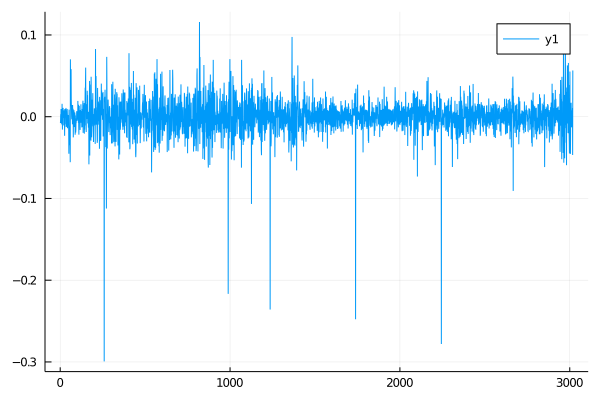

In [58]:
plot(ε_wa, grid=true)

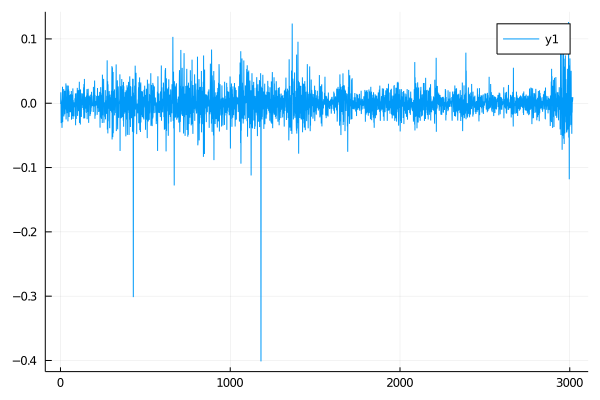

In [59]:
plot(ε_ca, grid=true)

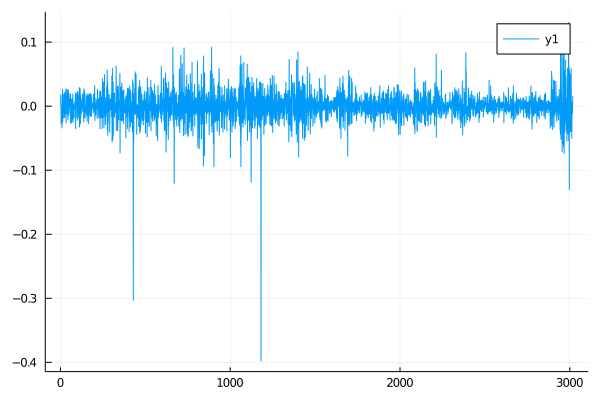

In [60]:
plot(ε_cw, grid=true)

# __Error Correction__

### __CTWS and WTR__

In [74]:
ec_reg_cw = GLM.lm(@formula(Δctws ~ Δctwslag + Δwtrlag + ε_cw), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δctws ~ 1 + Δctwslag + Δwtrlag + ε_cw

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)     Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -7.08252e-5  6.72872e-5   -1.05    0.2926  -0.000202759  6.11082e-5
Δctwslag      0.00203359  0.00303234    0.67    0.5025  -0.00391208   0.00797925
Δwtrlag      -0.00139851  0.00310977   -0.45    0.6529  -0.007496     0.00469897
ε_cw          1.00041     0.00303297  329.84    <1e-99   0.994463     1.00636
────────────────────────────────────────────────────────────────────────────────

In [73]:
ec_reg2_cw = GLM.lm(@formula(Δwtr ~ Δctwslag + Δwtrlag + ε_cw), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δwtr ~ 1 + Δctwslag + Δwtrlag + ε_cw

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   6.42047e-6  0.000399902   0.02    0.9872  -0.000777687  0.000790528
Δctwslag      0.012086    0.0180218     0.67    0.5025  -0.0232503    0.0474224
Δwtrlag      -0.00831166  0.018482     -0.45    0.6529  -0.0445503    0.027927
ε_cw          0.00243442  0.0180256     0.14    0.8926  -0.0329093    0.0377781
─────────────────────────────────────────────────────────────────────────────────

### __WTR and AWR__

In [75]:
ec_reg_wa = GLM.lm(@formula(Δwtr ~ Δwtrlag + Δawrlag + ε_wa), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δwtr ~ 1 + Δwtrlag + Δawrlag + ε_wa

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   7.43109e-6  0.000109631    0.07    0.9460  -0.000207528   0.00022239
Δwtrlag      -0.00225963  0.00519647    -0.43    0.6637  -0.0124486     0.00792935
Δawrlag      -0.0179095   0.00532618    -3.36    0.0008  -0.0283529    -0.00746624
ε_wa          1.0006      0.00519585   192.58    <1e-99   0.990414      1.01079
──────────────────────────────────────────────────────────────────────────────────

In [76]:
ec_reg2_wa = GLM.lm(@formula(Δawr ~ Δwtrlag + Δawrlag + ε_wa), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δawr ~ 1 + Δwtrlag + Δawrlag + ε_wa

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.000142843  0.000389892   0.37    0.7141  -0.000621639   0.000907324
Δwtrlag      -0.00803617   0.0184808    -0.43    0.6637  -0.0442724     0.0282
Δawrlag      -0.0636937    0.0189421    -3.36    0.0008  -0.100834     -0.026553
ε_wa          0.00214036   0.0184786     0.12    0.9078  -0.0340915     0.0383722
───────────────────────────────────────────────────────────────────────────────────

### __CTWS and AWR__

In [77]:
ec_reg_ca = GLM.lm(@formula(Δctws ~ Δctwslag + Δawrlag + ε_ca), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δctws ~ 1 + Δctwslag + Δawrlag + ε_ca

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)  -6.96502e-5  9.17635e-5   -0.76    0.4479  -0.000249575   0.000110275
Δctwslag     -0.0032663   0.00418404   -0.78    0.4351  -0.0114702     0.00493757
Δawrlag      -0.0147333   0.00439976   -3.35    0.0008  -0.0233601    -0.00610647
ε_ca          0.999305    0.00418392  238.84    <1e-99   0.991101      1.00751
──────────────────────────────────────────────────────────────────────────────────

In [78]:
ec_reg2_ca = GLM.lm(@formula(Δawr ~ Δctwslag + Δawrlag + ε_ca), ε_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Δawr ~ 1 + Δctwslag + Δawrlag + ε_ca

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.000141674  0.00038987   0.36    0.7163  -0.000622764   0.000906112
Δctwslag     -0.0138773    0.0177765   -0.78    0.4351  -0.0487326     0.0209779
Δawrlag      -0.0625965    0.018693    -3.35    0.0008  -0.0992488    -0.0259442
ε_ca         -0.0029532    0.017776    -0.17    0.8681  -0.0378074     0.031901
──────────────────────────────────────────────────────────────────────────────────

# __Discussion of Analysis: Application to Pairs Trading Strategies__

You should make tables of the results in your
document and write several paragraphs of prose to explain the results.

This project does not require you to carry out the analysis for the actual trading strategy returns. Instead,
you are required to discuss how the results you found in your analysis of cointegration and error-correction
enable you to form such strategies. Outline a strategy of how you would use the econometric foundation from
your analysis to set up and carry out pairs trading strategies in real life. What factors need to be considered
when going from econometric models to real life trading? What data, systems, or other factors need to be
considered? How does having an econometric foundation aid the process? What other statistical, machine
learning, or econometric methods or procedures would aid your plan? What concerns about the process do
you forsee as the portfolio manager?
